Data source: https://www.kaggle.com/mirichoi0218/insurance/downloads/insurance.zip/1

# Introduction

Health insurance in India is a growing segment of India's economy. The Indian health system is one of the largest in the world, with the number of people it concerns: nearly 1.3 billion potential beneficiaries. The health industry in India has rapidly become one of the most important sectors in the country in terms of income and job creation. In 2018, one hundred million Indian households (500 million people) do not benefit from health coverage. In 2011, 3.9%[1] of India's gross domestic product was spent in the health sector.

According to the World Health Organization (WHO), this is among the lowest of the BRICS (Brazil, Russia, India, China, South Africa) economies. Policies are available that offer both individual and family cover. Out of this 3.9%, health insurance accounts for 5-10% of expenditure, employers account for around 9% while personal expenditure amounts to an astounding 82%.

In the year 2016, the NSSO released the report “Key Indicators of Social Consumption in India: Health” based on its 71st round of surveys. The survey carried out in the year 2014 found out that, more than 80% of Indians are not covered under any health insurance plan, and only 18% (government funded 12%) of the urban population and 14% (government funded 13%) of the rural population was covered under any form of health insurance.

India's public health expenditures are lower than those of other middle-income countries. In 2012, they accounted for 4% of GDP, which is half as much as in China with 5.1%. In terms of public health spending per capita, India ranks 184th out of 191 countries in 2012. Patients' remaining costs represent about 58% of the total.[4] The remaining costs borne by the patient represent an increasing share of the household budget, from 5% of this budget in 2000 to over 11% in 2004-2005.[5] On average, the remaining costs of poor households as a result of hospitalization accounted for 140% of their annual income in rural areas and 90% in urban areas.

This financial burden has been one of the main reasons for the introduction of health insurance covering the hospital costs of the poorest.

# Data Description:

The data at hand contains medical costs of people characterized by certain attributes.

# Domain:
Healthcare

# Context:
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to have.

# Attribute Information:

- age : age of primary beneficiary
- sex : insurance contractor gender, female, male
- bmi : Body mass index, providing an understanding of body,
- weights that are relatively high or low relative to height,
- objective index of body weight (kg / m ^ 2) using the ratio of
- height to weight, ideally 18.5 to 24.9
- children : Number of children covered by health insurance /
- Number of dependents
- smoker : Smoking
- region : the beneficiary's residential area in the US, northeast,southeast, southwest, northwest.
- charges : Individual medical costs billed by health insurance.

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [2]:
os.chdir("/Users/usha/Documents/BACP/Course Mentor/DSBA Group 8/Session 3 - Apr 12 2020")

In [3]:
os.getcwd()

'/Users/usha/Documents/BACP/Course Mentor/DSBA Group 8/Session 3 - Apr 12 2020'

In [0]:
sns.set() #setting the default seaborn style for our plots

## Read the data into the notebook

In [4]:
df = pd.read_csv("insurance.csv") # read the data as a data frame

In [55]:
df.head(10)  #checking the head of the data frame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Basic EDA
* Find the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [9]:
df.info()  #info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### - The data has 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type(Strings in the column) 

In [10]:
df.shape

(1338, 7)

In [62]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The data set contains 1338 observatiosn of data and 7 variables.

# Check for missing value

In [14]:
# Check for missing value in any colum
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### - There are no null values in any of the column

# Checking the summary of dataframe

In [64]:
df.describe().transpose()   # five point summary of the continuous attributes

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


-Data looks legit as all the statistics seem reasonable
-Looking at the age column, data looks representative of the true age distribution of the adult population
-Very few people have more than 2 children. 75% of the people have 2 or less children
-The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from             diseases which cost more to get rid of

# Plot the Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2135e8d0>,
      dtype=object)

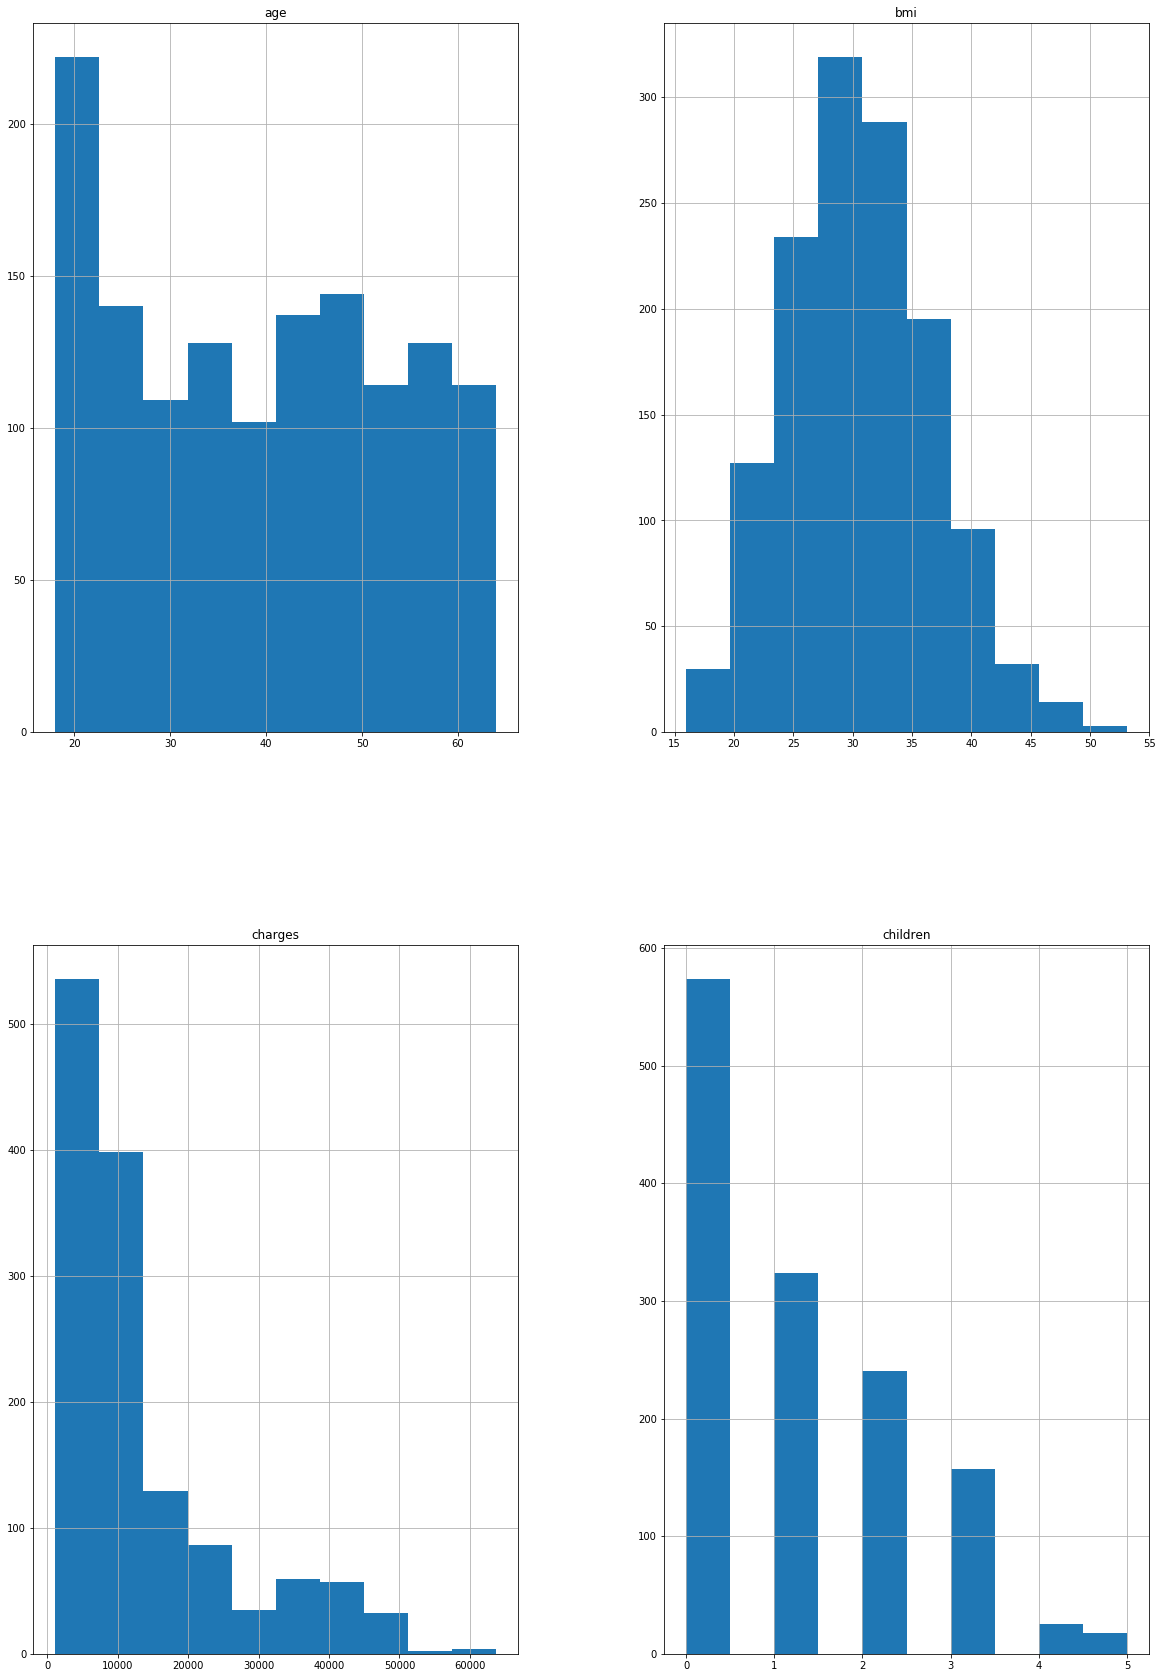

In [69]:
#Plots to see the distribution of the continuous features individually
df.hist(figsize=(20,30))

In [70]:
stats.skew(df.bmi)

0.28372857291709386

In [71]:
stats.skew(df.age)

0.055610083072599126

In [44]:
stats.skew(df.charges)

1.5141797118745743

- bmi looks quiet normally distributed 
- Age seems be be distributed quiet uniformly 
- As seen in the previous step, charges are highly skewed

In [72]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


- Skew of bmi is very less as seen in the previous step
- age is uniformly distributed and there's hardly any skew
- charges are highly skewed

# Check Outliers

Box plot will be plotted to check for outliers.

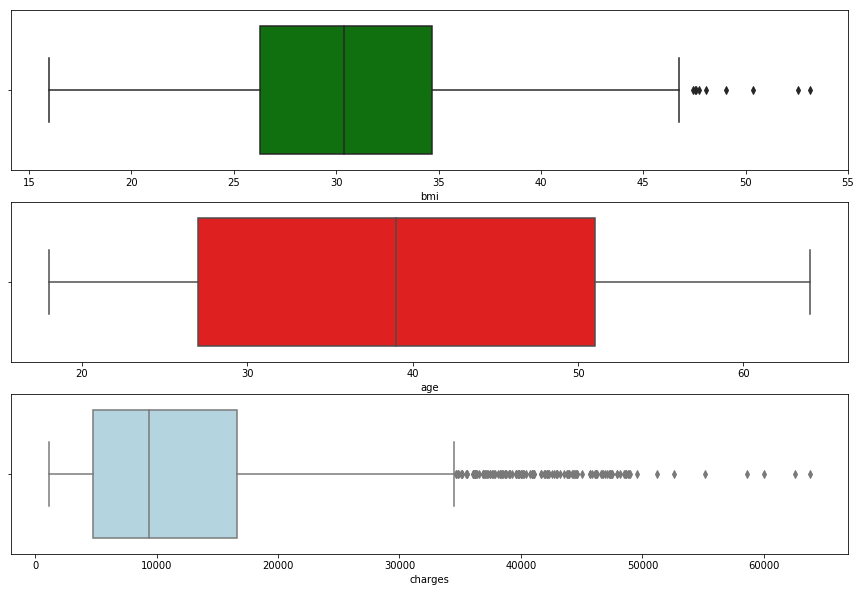

In [77]:
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='green')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='red')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='lightblue')

plt.show()

- There are no outliers present in the age variable. 
- bmi variable shows presence of few extreme values 
- charges as it is highly skewed, there are quiet a lot of extreme values.

# Plot Count Plot

We will plot various  count plot to see how the variable has been distributed.

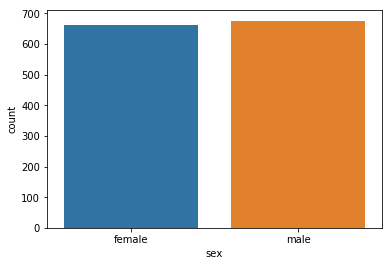

In [78]:
sns.countplot(x=df['sex'])

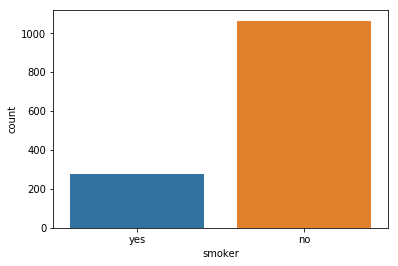

In [79]:
sns.countplot(x=df['smoker'])

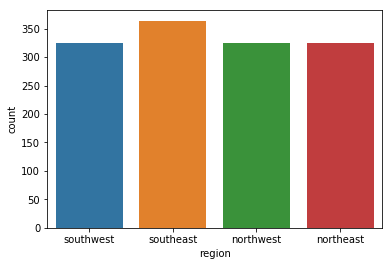

In [80]:
sns.countplot(x=df['region'])

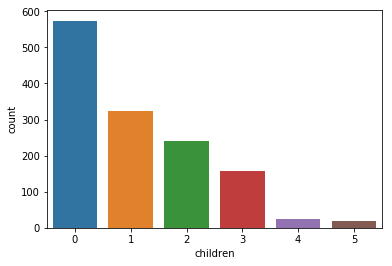

In [33]:
sns.countplot(x=df['children'])

- There are a lot more non-smokers than there are smokers in the data
- Instances are distributed evenly accross all regions
- Gender is also distributed evenly
- Most instances have less than 2 children and very few have 4 or 5 children

### Bi-variate distribution of every possible attribute pair

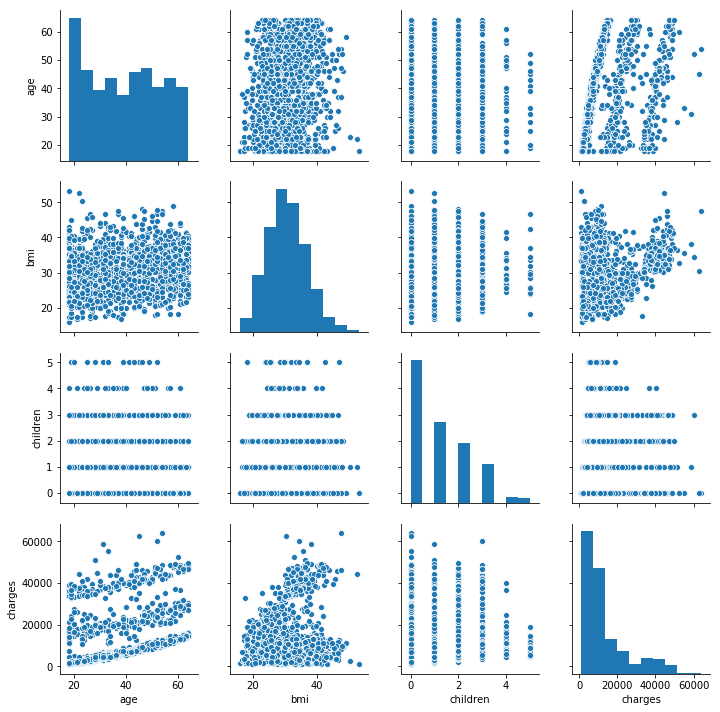

In [83]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 


sns.pairplot(df)  #pairplot
plt.show()

- The only obvious correlation of 'charges' is with 'smoker' 
- Looks like smokers claimed more money than non-smokers
- There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones

# Check Correlation

To find out the correlation we will use the corr function and also we will plot a heatmap to visualise this correlation.

In [84]:
corr = df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


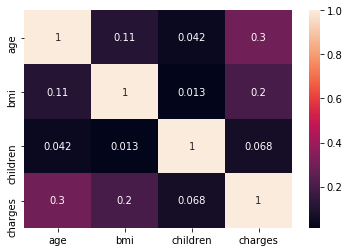

In [87]:
sns.heatmap(corr,annot=True)

## Do charges of people who smoke differ significantly from the people who don't?

In [88]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

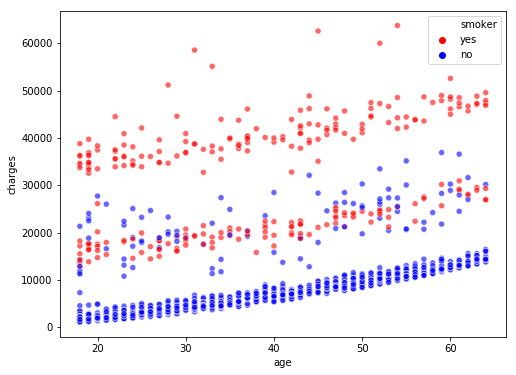

In [90]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','blue'] ,alpha=0.6)
plt.show()

- Visually the difference between charges of smokers and charges of non-smokers is apparent

## Does bmi of males differ significantly from that of females?

In [40]:
df.sex.value_counts()   #Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

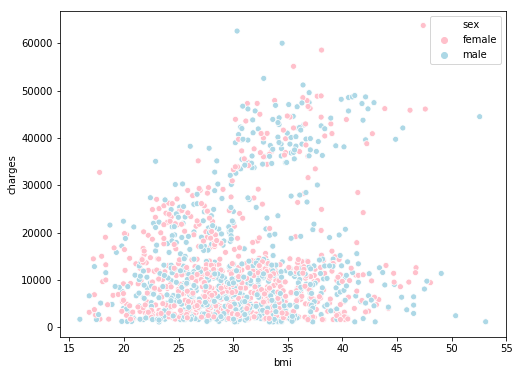

In [91]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.bmi, df.charges,hue=df.sex,palette= ['pink','lightblue'] )
plt.show()

##### * bmi of both the genders are identical